In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Data Preparation and Exploration

In [20]:
df = pd.read_csv('german_credit_card.csv')
df.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [21]:
df.describe()
df.info()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
Creditability                        1000 non-null int64
Account Balance                      1000 non-null int64
Duration of Credit (month)           1000 non-null int64
Payment Status of Previous Credit    1000 non-null int64
Purpose                              1000 non-null int64
Credit Amount                        1000 non-null int64
Value Savings/Stocks                 1000 non-null int64
Length of current employment         1000 non-null int64
Instalment per cent                  1000 non-null int64
Sex & Marital Status                 1000 non-null int64
Guarantors                           1000 non-null int64
Duration in Current address          1000 non-null int64
Most valuable available asset        1000 non-null int64
Age (years)                          1000 non-null int64
Concurrent Credits                   1000 non-null int64
Type of apartment                    10

## Analyzing Creditability

,Creditability
Credit Risk,
Bad,300
Good,700


Text(0.5,1,'Good Credit Rating vs. Bad Credit Rating')

Text(0,0.5,'Frequency')

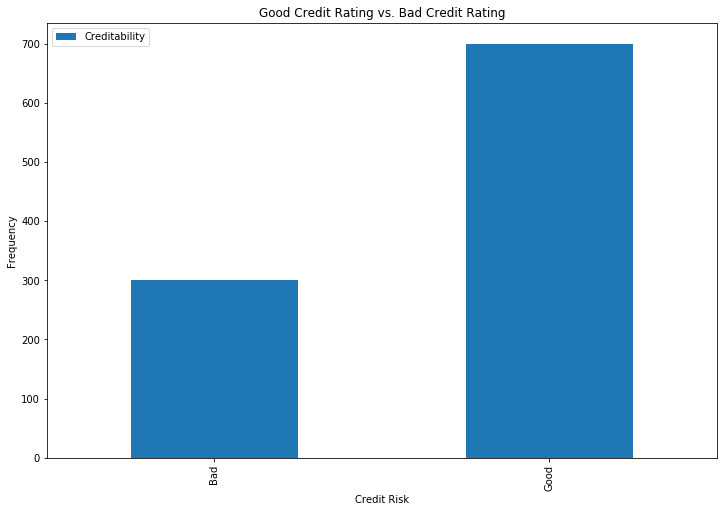

In [22]:
df['Credit Risk'] = 'Good'
df.loc[df['Creditability'] == 0, 'Credit Risk'] = 'Bad'

val_count = df.pivot_table(values = ['Creditability'], index = ['Credit Risk'], aggfunc = 'count')
val_count

ax = val_count.plot.bar(figsize = [12,8])
plt.title('Good Credit Rating vs. Bad Credit Rating')
plt.ylabel('Frequency')
plt.legend(loc = 'best')

## Analyzing Qualitative Variables

## Account Balance vs. Creditability

Creditability     
Credit Risk                   Bad Good
Account Balance                       
< 0 DM                        135  139
0<=...<200 DM                 105  164
> 200 DM                       14   49
No checking account            46  348

Text(0.5,1,'Account Balance vs. Bad Credit Rating')

Text(0,0.5,'Frequency')

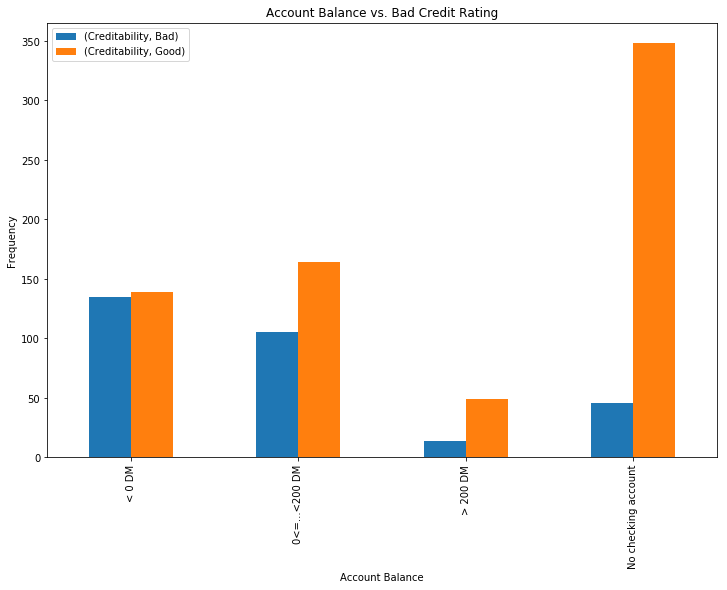

In [23]:
val_count = df.pivot_table(values = ['Creditability'], columns = ['Credit Risk'], 
                           index = ['Account Balance'], aggfunc = 'count')

val_count.rename(index={1: '< 0 DM', 2: '0<=...<200 DM', 3: '> 200 DM', 4: 'No checking account'}, 
                 inplace = True)
val_count

ax = val_count.plot.bar(figsize = [12,8])
plt.title('Account Balance vs. Bad Credit Rating')
plt.ylabel('Frequency')
plt.legend(loc = 'best')

## Payment Status of Previous Credit vs Creditability

Creditability     
Credit Risk                                        Bad Good
Payment Status of Previous Credit                          
no credits taken                                    25   15
all credits at this bank paid back duly             28   21
existing credits paid back duly till now           169  361
delay in paying off in the past                     28   60
critical account                                    50  243

Text(0.5,1,'Payment of Previous Credit vs. Bad Credit Rating')

Text(0,0.5,'Frequency')

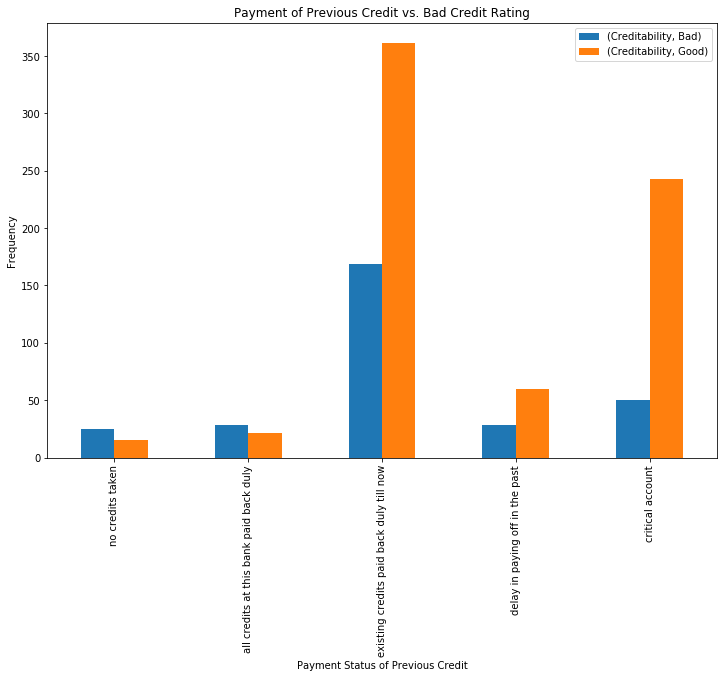

In [24]:
val_count = df.pivot_table(values = ['Creditability'], columns = ['Credit Risk'], 
                           index = ['Payment Status of Previous Credit'], aggfunc = 'count')
val_count.rename(index={0: 'no credits taken', 1: 'all credits at this bank paid back duly', 
                        2: 'existing credits paid back duly till now', 
                        3: 'delay in paying off in the past', 4: 'critical account'}, inplace = True)
val_count

ax = val_count.plot.bar(figsize = [12,8])
plt.title('Payment of Previous Credit vs. Bad Credit Rating')
plt.ylabel('Frequency')
plt.legend(loc = 'best')

## Purpose vs. Creditability

Creditability     
Credit Risk                   Bad Good
Purpose                               
New car                        89  145
Used car                       17   86
Furniture/Equipment            58  123
Radio/Television               62  218
Domestic Appliances             4    8
Repairs                         8   14
Education                      22   28
Retraining                      1    8
Business                       34   63
Others                          5    7

Text(0.5,1,'Purpose vs. Bad Credit Rating')

Text(0,0.5,'Frequency')

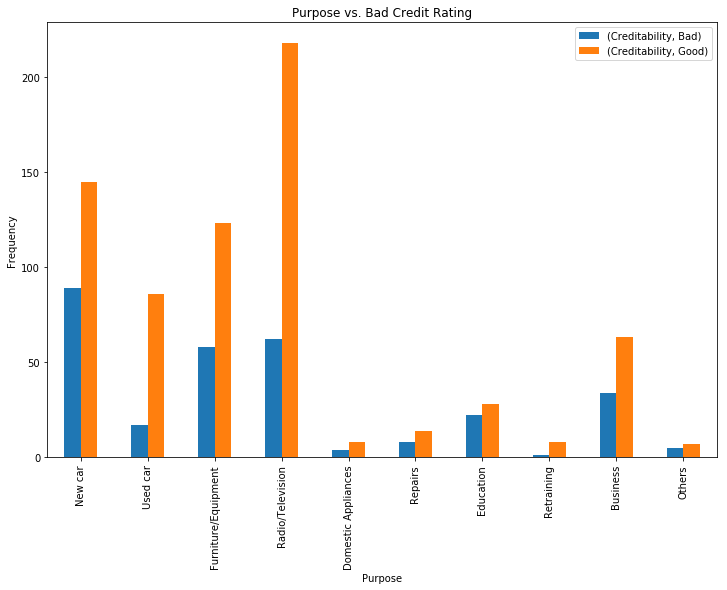

In [25]:
val_count = df.pivot_table(values = ['Creditability'], columns = ['Credit Risk'], 
                           index = ['Purpose'], aggfunc = 'count')
val_count.rename(index={0: 'New car', 1: 'Used car', 2: 'Furniture/Equipment', 3: 'Radio/Television', 
                        4: 'Domestic Appliances', 5: 'Repairs', 6: 'Education', 7: 'Vacation',
                        8: 'Retraining', 9: 'Business', 10: 'Others'}, inplace = True)
val_count

ax = val_count.plot.bar(figsize = [12,8])
plt.title('Purpose vs. Bad Credit Rating')
plt.ylabel('Frequency')
plt.legend(loc = 'best')

## Value Savings/Stocks vs. Creditability

Creditability     
Credit Risk                           Bad Good
Value Savings/Stocks                          
<100 DM                               217  386
100<= ... < 500 DM                     34   69
500<= ... < 1000 DM                    11   52
=>1000 DM                               6   42
unknown/ no savings account            32  151

Text(0.5,1,'Value Savings/Stocks vs Creditability')

Text(0,0.5,'Frequency')

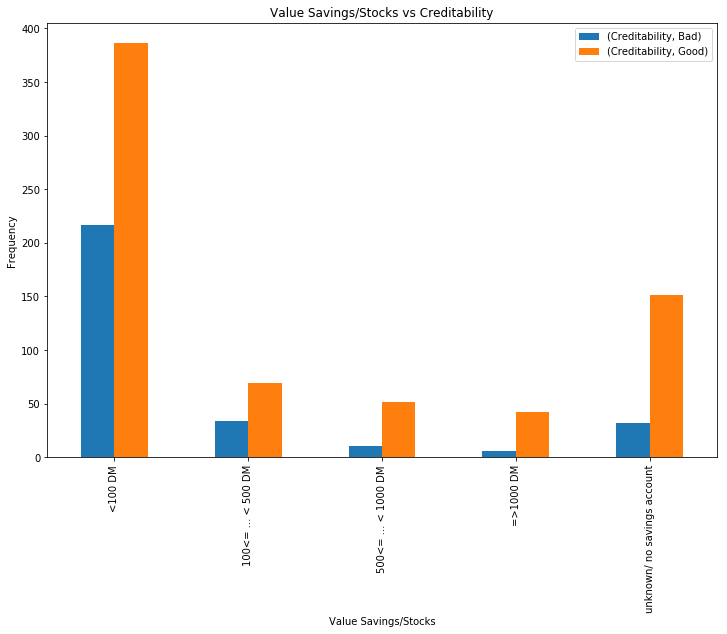

In [26]:
val_count = df.pivot_table(values = ['Creditability'], columns = ['Credit Risk'], 
                           index = ['Value Savings/Stocks'], aggfunc = 'count')

val_count.rename(index={1 : '<100 DM', 2: '100<= ... < 500 DM', 3 : '500<= ... < 1000 DM', 
                        4 : '=>1000 DM', 5: 'unknown/ no savings account'}, inplace = True)
val_count

ax = val_count.plot.bar(figsize = [12,8])
plt.title('Value Savings/Stocks vs Creditability')
plt.ylabel('Frequency')
plt.legend(loc = 'best')

## Length of Current Employment vs. Creditability

Creditability     
Credit Risk                            Bad Good
Length of current employment                   
unemployed                              23   39
< 1 year                                70  102
1<=...<4 years                         104  235
4<=...<7 years                          39  135
>=7years                                64  189

Text(0.5,1,'Length of Current Employment vs Creditability')

Text(0,0.5,'Frequency')

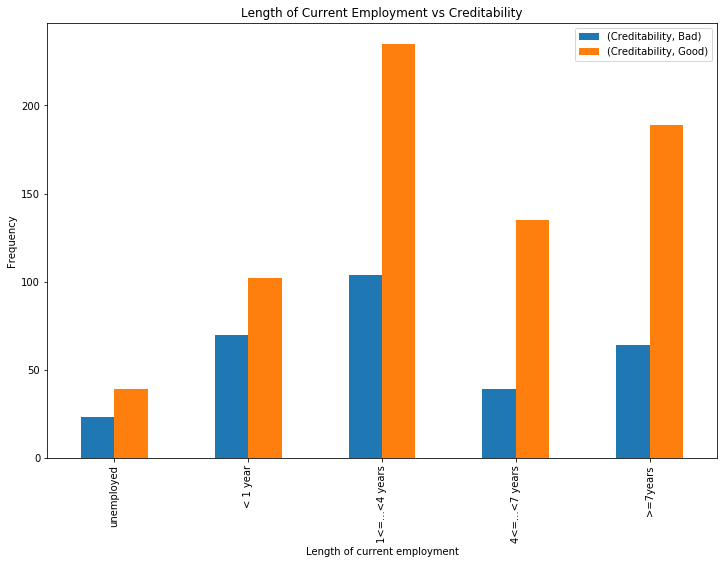

In [27]:
val_count = df.pivot_table(values = ['Creditability'], columns = ['Credit Risk'], 
                           index = ['Length of current employment'], aggfunc = 'count')

val_count.rename(index={1: 'unemployed', 2: '< 1 year', 3: '1<=...<4 years', 4: '4<=...<7 years', 
                        5: '>=7years'}, inplace = True)
val_count

ax = val_count.plot.bar(figsize = [12,8])
plt.title('Length of Current Employment vs Creditability')
plt.ylabel('Frequency')
plt.legend(loc = 'best')

## Sex & Marital Status vs. Creditability

Creditability     
Credit Risk                                    Bad Good
Sex & Marital Status                                   
male: divorced/ separated                       20   30
female: divorced/ separated/ married           109  201
male: single                                   146  402
male: married/ widowed                          25   67

Text(0.5,1,'Sex & Marital Status vs Creditability')

Text(0,0.5,'Frequency')

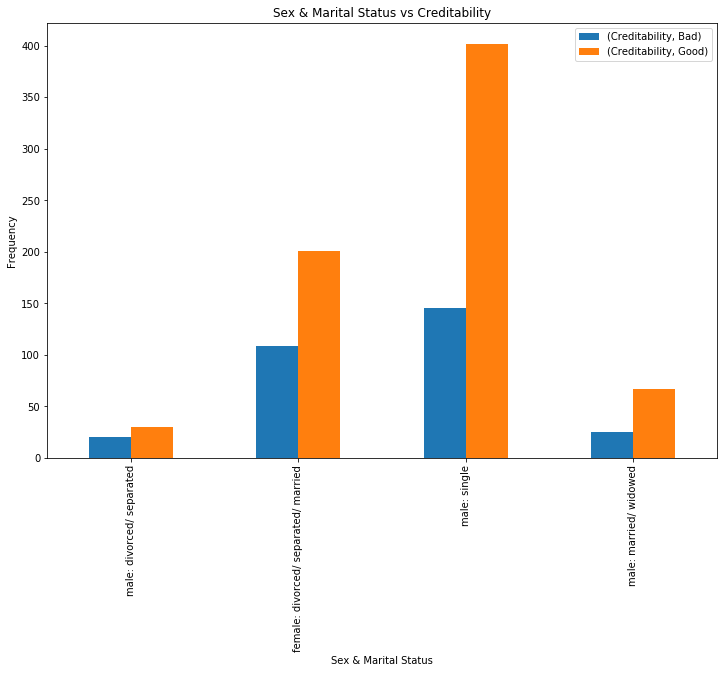

In [28]:
val_count = df.pivot_table(values = ['Creditability'], columns = ['Credit Risk'], 
                           index = ['Sex & Marital Status'], aggfunc = 'count')

val_count.rename(index={1: 'male: divorced/ separated', 2: 'female: divorced/ separated/ married', 
                        3: 'male: single', 4: 'male: married/ widowed', 5: 'female: single'}, 
                 inplace = True)
val_count

ax = val_count.plot.bar(figsize = [12,8])
plt.title('Sex & Marital Status vs Creditability')
plt.ylabel('Frequency')
plt.legend(loc = 'best')

## Guarantors vs. Creditability

Creditability     
Credit Risk            Bad Good
Guarantors                     
none                   272  635
co-applicant            18   23
guarantor               10   42

Text(0.5,1,'Guarantors vs Creditability')

Text(0,0.5,'Frequency')

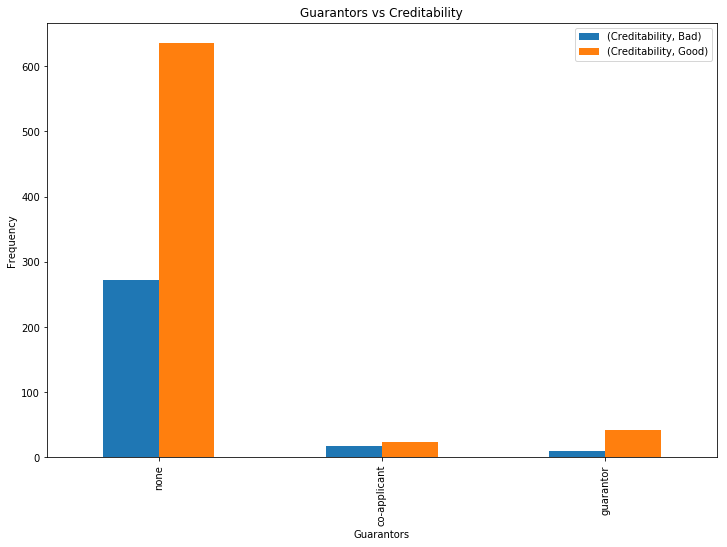

In [29]:
val_count = df.pivot_table(values = ['Creditability'], columns = ['Credit Risk'], 
                           index = ['Guarantors'], aggfunc = 'count')

val_count.rename(index={1: 'none', 2: 'co-applicant', 3: 'guarantor'}, inplace = True)
val_count

ax = val_count.plot.bar(figsize = [12,8])
plt.title('Guarantors vs Creditability')
plt.ylabel('Frequency')
plt.legend(loc = 'best')

## Most Valuable Available Asset vs Creditability

Creditability     
Credit Risk                                 Bad Good
Most valuable available asset                       
real estate                                  60  222
savings agreement/ life insurance            71  161
car or other                                102  230
unknown/ no property                         67   87

Text(0.5,1,'Most Valuable Available Asset vs Creditability')

Text(0,0.5,'Frequency')

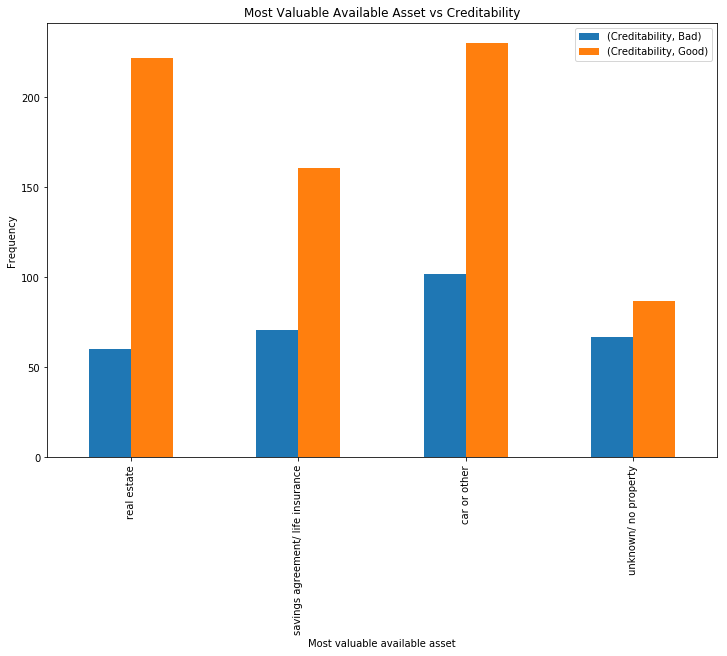

In [30]:
val_count = df.pivot_table(values = ['Creditability'], columns = ['Credit Risk'], 
                           index = ['Most valuable available asset'], aggfunc = 'count')

val_count.rename(index={1: 'real estate', 2: 'savings agreement/ life insurance', 3: 'car or other', 
                        4: 'unknown/ no property'}, inplace = True)
val_count

ax = val_count.plot.bar(figsize = [12,8])
plt.title('Most Valuable Available Asset vs Creditability')
plt.ylabel('Frequency')
plt.legend(loc = 'best')

## Duration in Current address vs. Creditability

Creditability     
Credit Risk                           Bad Good
Duration in Current address                   
<= 1 year                              36   94
1<...<=2 years                         97  211
2<...<=3 years                         43  106
>4years                               124  289

Text(0.5,1,'Duration in Current address vs Creditability')

Text(0,0.5,'Frequency')

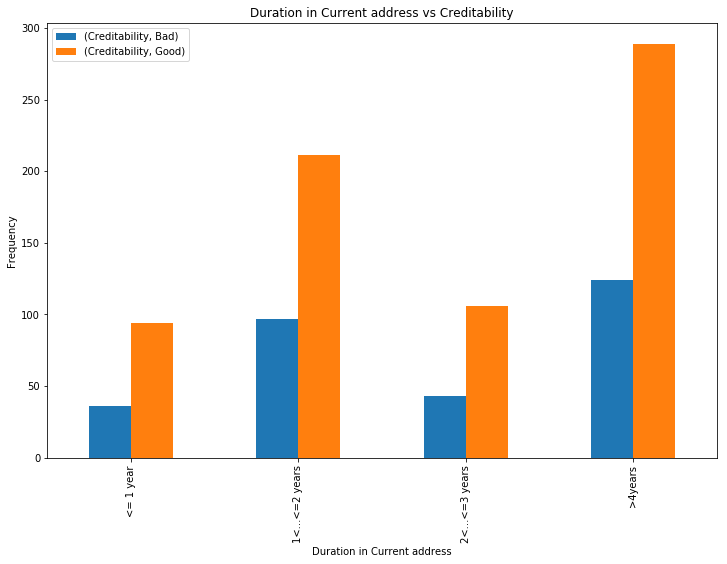

In [31]:
val_count = df.pivot_table(values = ['Creditability'], columns = ['Credit Risk'], 
                           index = ['Duration in Current address'], aggfunc = 'count')

val_count.rename(index={1: '<= 1 year', 2: '1<...<=2 years', 3: '2<...<=3 years', 4: '>4years'}, 
                 inplace = True)
val_count

ax = val_count.plot.bar(figsize = [12,8])
plt.title('Duration in Current address vs Creditability')
plt.ylabel('Frequency')
plt.legend(loc = 'best')

## Concurrent Credits vs Creditability

Creditability     
Credit Risk                  Bad Good
Concurrent Credits                   
bank                          57   82
stores                        19   28
none                         224  590

Text(0.5,1,'Concurrent Credits vs Creditability')

Text(0,0.5,'Frequency')

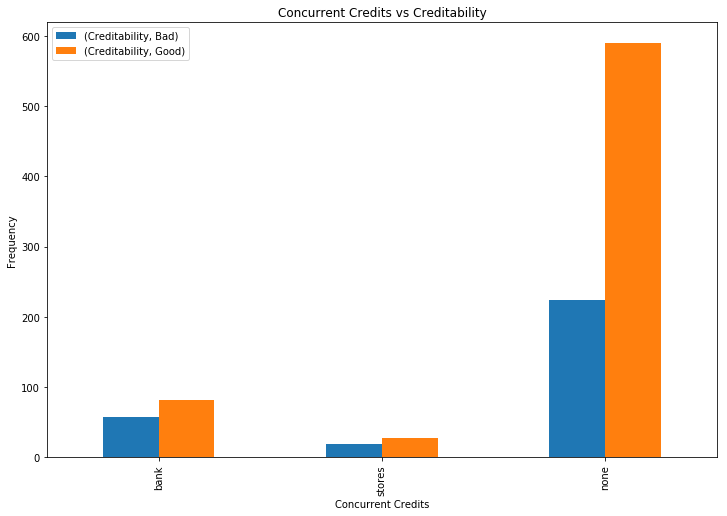

In [32]:
val_count = df.pivot_table(values = ['Creditability'], columns = ['Credit Risk'], 
                           index = ['Concurrent Credits'], aggfunc= 'count')

val_count.rename(index={1: 'bank', 2: 'stores', 3: 'none'}, inplace = True)
val_count

val_count.plot.bar(figsize = [12,8])
plt.title('Concurrent Credits vs Creditability')
plt.ylabel('Frequency')
plt.legend(loc = 'best')

## Type of Apartment vs Creditability

Creditability     
Credit Risk                 Bad Good
Type of apartment                   
rent                         70  109
own                         186  528
for free                     44   63

Text(0.5,1,'Type of Apartment vs Creditability')

Text(0,0.5,'Frequency')

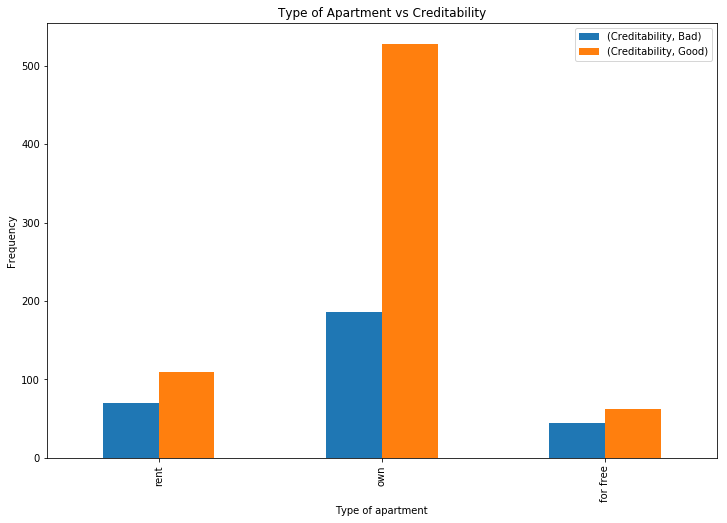

In [33]:
val_count = df.pivot_table(values = ['Creditability'], columns = ['Credit Risk'], 
                           index = ['Type of apartment'], aggfunc = 'count')

val_count.rename(index = {1: 'rent', 2: 'own', 3: 'for free'}, inplace = True)
val_count

val_count.plot.bar(figsize = [12,8])
plt.title('Type of Apartment vs Creditability')
plt.ylabel('Frequency')
plt.legend(loc = 'best')

## Occupation vs Creditability

Creditability     
Credit Risk                                                  Bad Good
Occupation                                                           
unemployed/ unskilled - non-resident                           7   15
unskilled - resident                                          56  144
skilled employee/ official                                   186  444
management/ self-employed/highly qualified empl...            51   97

Text(0.5,1,'Occupation vs Creditability')

Text(0,0.5,'Frequency')

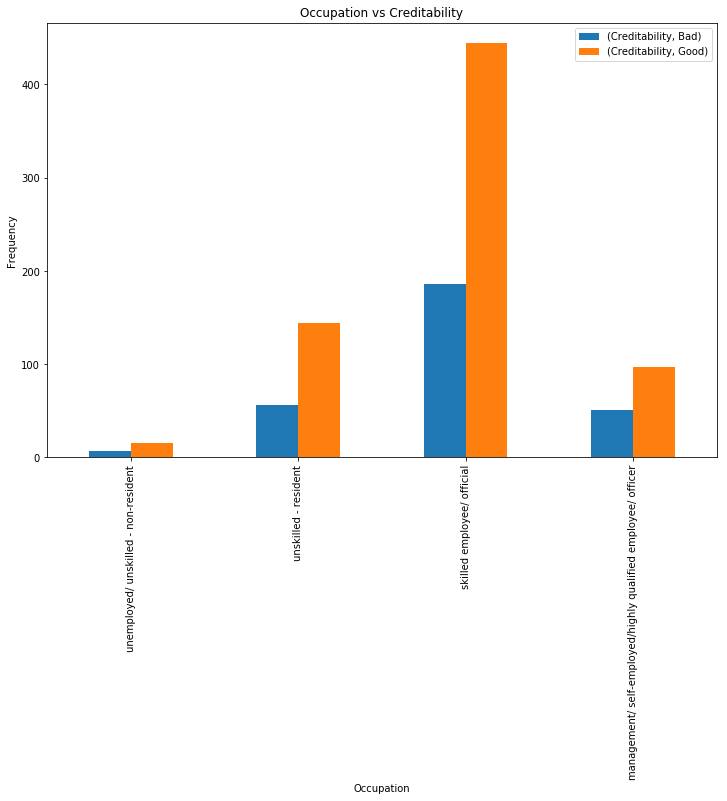

In [34]:
val_count = df.pivot_table(values = ['Creditability'], columns = ['Credit Risk'], 
                           index = ['Occupation'], aggfunc = 'count')

val_count.rename(index = {1: 'unemployed/ unskilled - non-resident', 2: 'unskilled - resident',
                          3: 'skilled employee/ official', 
                          4: 'management/ self-employed/highly qualified employee/ officer'}, 
                 inplace = True)
val_count

val_count.plot.bar(figsize = [12,8])
plt.title('Occupation vs Creditability')
plt.ylabel('Frequency')
plt.legend(loc = 'best')

## Telephone vs Creditability

Creditability     
Credit Risk           Bad Good
Telephone                     
yes                   187  409
No                    113  291

Text(0.5,1,'Telephone vs Creditability')

Text(0,0.5,'Frequency')

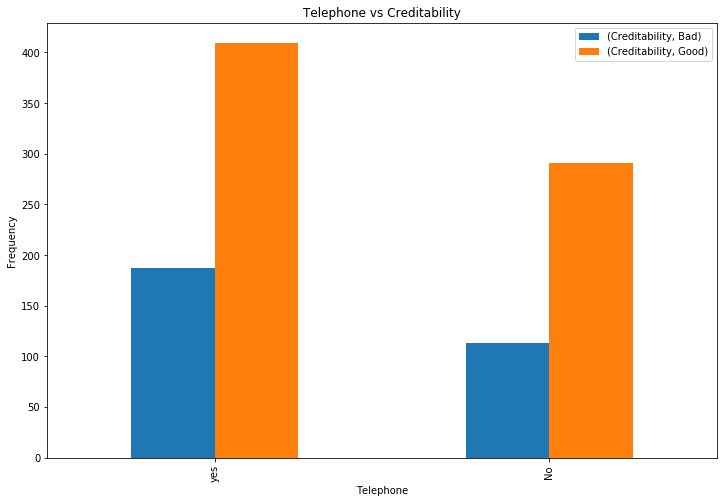

In [35]:
val_count = df.pivot_table(values = ['Creditability'], columns = ['Credit Risk'], 
                           index = ['Telephone'], aggfunc = 'count')

val_count.rename(index = {1: 'yes', 2: 'No'}, inplace = True)
val_count

val_count.plot.bar(figsize = [12,8])
plt.title('Telephone vs Creditability')
plt.ylabel('Frequency')
plt.legend(loc = 'best')

##  Foreign Worker vs Creditability

Text(0.5,1,'Foreign Worker vs Creditability')

Text(0,0.5,'Frequency')

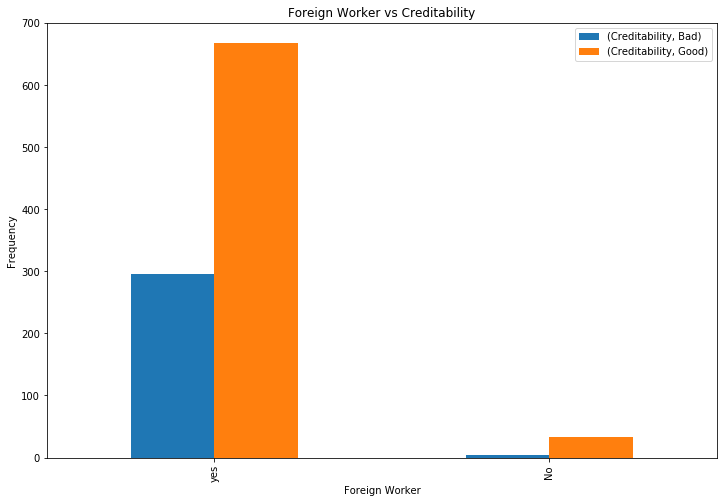

In [36]:
val_count = df.pivot_table(values = ['Creditability'], columns = ['Credit Risk'], 
                           index = ['Foreign Worker'], aggfunc = 'count')

val_count.rename(index = {1: 'yes', 2: 'No'}, inplace = True)

val_count.plot.bar(figsize = [12,8])
plt.title('Foreign Worker vs Creditability')
plt.ylabel('Frequency')
plt.legend(loc = 'best')

## Analyzing Quantitative Variables

## Duration of Credit vs. Creditability

Creditability       
Credit Risk                          Bad   Good
Duration of Credit (month)                     
4                                    NaN    6.0
5                                    NaN    1.0
6                                    9.0   66.0
7                                    NaN    5.0
8                                    1.0    6.0
9                                   14.0   35.0
10                                   3.0   25.0
11                                   NaN    9.0
12                                  49.0  130.0
13                                   NaN    4.0
14                                   1.0    3.0
15                                  12.0   52.0
16                                   1.0    1.0
18                                  42.0   71.0
20                                   1.0    7.0
21                                   9.0   21.0
22                                   NaN    2.0
24                                  56.0  128.0
26                                   NaN    1.0
27                                   5.0    8.0
28                                   1.0    2.0
30                                  13.0   27.0
33                                   1.0    2.0
36                                  37.0   46.0
39                                   1.0    4.0
40                                   1.0    NaN
42                                   3.0    8.0
45                                   4.0    1.0
47                                   NaN    1.0
48                                  28.0   20.0
54                                   1.0    1.0
60                                   6.0    7.0
72                                   1.0    NaN

Text(0.5,1,'Duration of Credit vs Creditability')

Text(0,0.5,'Frequency')

Text(0.5,1,'Duration of Credit vs Good Credit')

Text(0,0.5,'months')

Text(0.5,1,'Duration of Credit vs Bad Credit')

Text(0,0.5,'months')

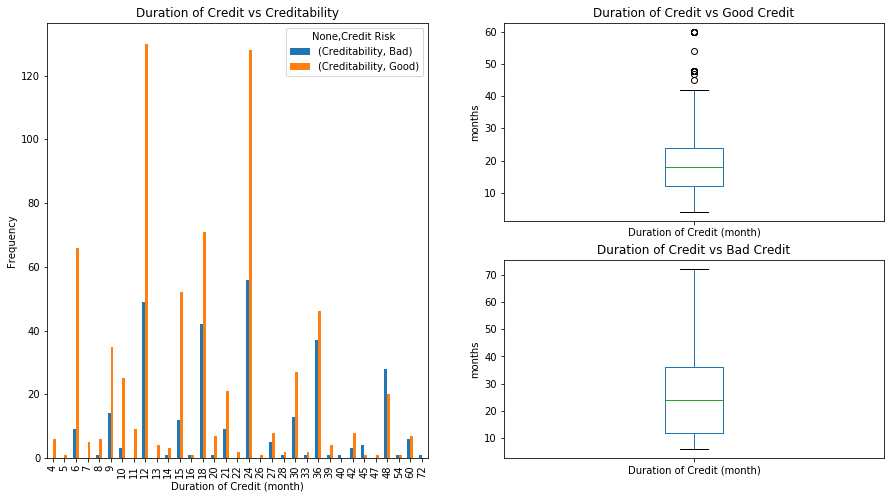

In [37]:
val_count = df.pivot_table(values = ['Creditability'], columns = ['Credit Risk'], 
                           index = ['Duration of Credit (month)'], aggfunc = 'count')
val_count

fig = plt.figure()

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(224)

val_count.plot.bar(ax = ax1, figsize = (15,8))
ax1.set_title('Duration of Credit vs Creditability')
ax1.set_ylabel('Frequency')

df[df['Credit Risk'] == 'Good']['Duration of Credit (month)'].plot.box(ax = ax2, figsize = (15,8))
ax2.set_title('Duration of Credit vs Good Credit')
ax2.set_ylabel('months')

df[df['Credit Risk'] == 'Bad']['Duration of Credit (month)'].plot.box(ax = ax3, figsize = (15,8))
ax3.set_title('Duration of Credit vs Bad Credit')
ax3.set_ylabel('months')

Creditability     
Credit Risk                        Bad Good
Duration of Credit Range                   
(3.932, 21.0]                      142  442
(21.0, 38.0]                       113  216
(38.0, 55.0]                        38   35
(55.0, 72.0]                         7    7

Text(0.5,1,'Duration of Credit vs Creditability')

Text(0,0.5,'Frequency')

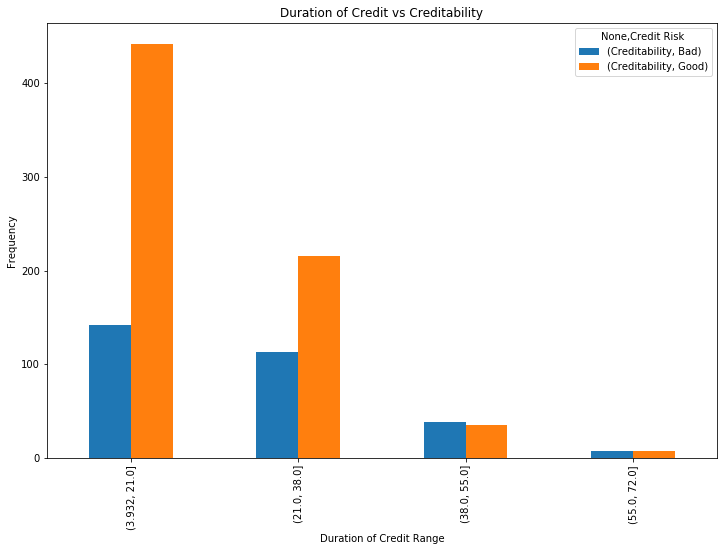

In [38]:
# Duration of Credit is the first quantitative column we come across with a wide range of values
# By Binning the data, we can divide this numerical variable, into groups for easier processing
# The function pandas.cut(dataframe, # of bins) will bin data into discrete intervals, based on the 
# dataset

# Duration of Credit has a wide range of values between 4 and 72, as seen in the graphs above
# A new column "Duration of Credit Range" is created, and "Duration of Credit (month)" is dropped

df['Duration of Credit Range'] = pd.cut(df['Duration of Credit (month)'], 4)

val_count = df.pivot_table(values = ['Creditability'], columns = ['Credit Risk'], 
                           index = ['Duration of Credit Range'], aggfunc = 'count')
val_count

val_count.plot.bar(figsize = (12,8))
plt.title('Duration of Credit vs Creditability')
plt.ylabel('Frequency')

df.drop(['Duration of Credit (month)'], axis = 1, inplace = True)

## Credit Amount vs. Creditability

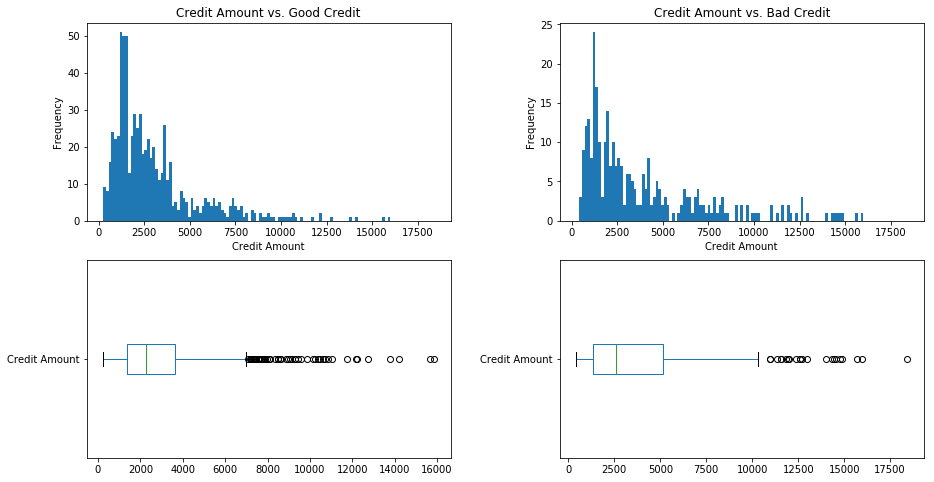

In [41]:
fig = plt.figure()

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
plt.subplots_adjust(wspace = 0.3)

df[df['Credit Risk'] == 'Good']['Credit Amount'].plot.hist(bins = range(df['Credit Amount'].min(), 
                                                                        df['Credit Amount'].max(), 150), 
                                                           ax = ax1, 
                                                           figsize = (8,15))
ax1.set_title('Credit Amount vs. Good Credit')
ax1.set_xlabel('Credit Amount')
ax1.set_ylabel('Frequency')

df[df['Credit Risk'] == 'Bad']['Credit Amount'].plot.hist(bins = range(df['Credit Amount'].min(), 
                                                                       df['Credit Amount'].max(), 150), 
                                                          ax = ax2,
                                                          figsize = (8,15))
ax2.set_title('Credit Amount vs. Bad Credit')
ax2.set_xlabel('Credit Amount')
ax2.set_ylabel('Frequency')

df[df['Credit Risk'] == 'Good']['Credit Amount'].plot.box(ax = ax3, figsize = (15,8), vert = False)

df[df['Credit Risk'] == 'Bad']['Credit Amount'].plot.box(ax = ax4, figsize = (15,8), vert = False);

Creditability     
Credit Risk                   Bad Good
Credit Amount Range                   
(231.826, 4793.5]             217  587
(4793.5, 9337.0]               55   94
(9337.0, 13880.5]              19   16
(13880.5, 18424.0]              9    3

Text(0.5,1,'Credit Amount vs Creditability')

Text(0,0.5,'Frequency')

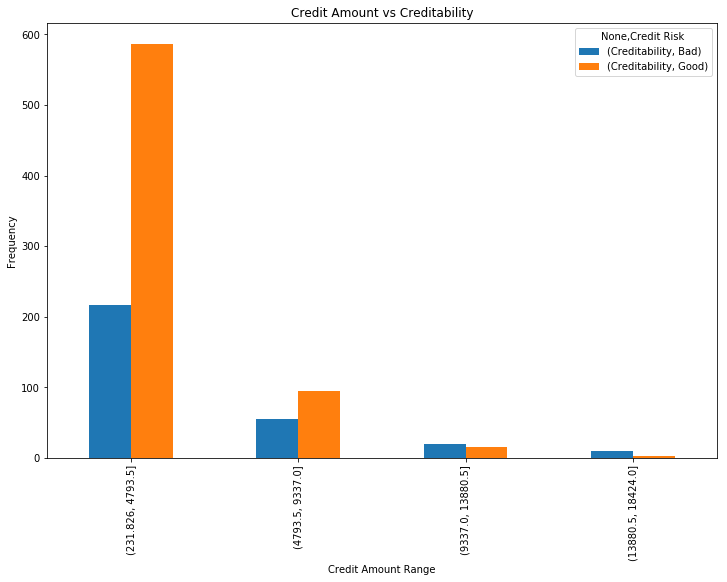

In [42]:
# Credit Amount has a wide range of values between 232 and 18424, as seen in the graphs above 
# The data is binned using a pd.cut(dataframe, # of bins)
# A new column "Credit Amount Range" is created, and "Credit Amount" is dropped

df['Credit Amount Range'] = pd.cut(df['Credit Amount'], 4)

val_count = df.pivot_table(values = ['Creditability'], columns = ['Credit Risk'], 
                           index = ['Credit Amount Range'], aggfunc = 'count')
val_count

val_count.plot.bar(figsize = (12,8))
plt.title('Credit Amount vs Creditability')
plt.ylabel('Frequency')

df.drop(['Credit Amount'], axis = 1, inplace = True)

## Instalment per cent vs. Creditability

Creditability     
Credit Risk                   Bad Good
Instalment per cent                   
1                              34  102
2                              62  169
3                              45  112
4                             159  317

Text(0.5,1,'Instalment per cent vs Creditability')

Text(0,0.5,'Frequency')

Text(0.5,1,'Instalment per cent vs Good Credit')

Text(0,0.5,'Instalment %')

Text(0.5,1,'Instalment per cent vs Bad Credit')

Text(0,0.5,'Instalment %')

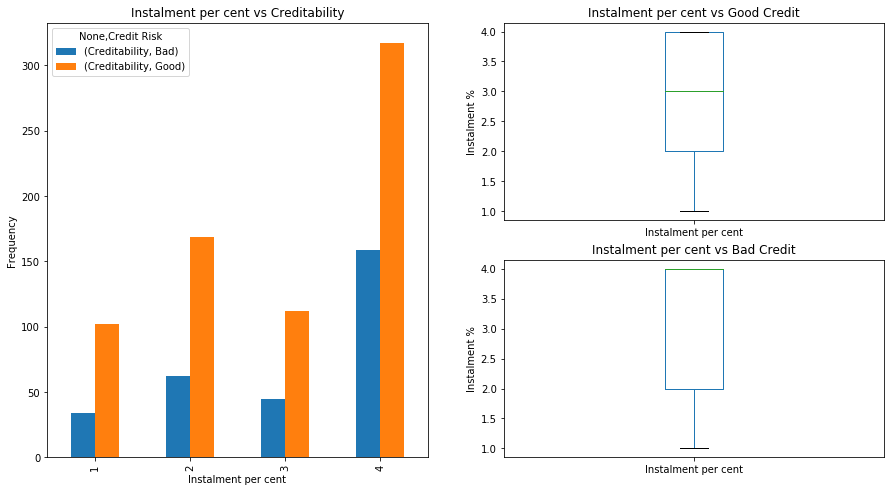

In [43]:
val_count = df.pivot_table(values = ['Creditability'], columns = ['Credit Risk'], 
                           index = ['Instalment per cent'], aggfunc = 'count')
val_count

fig = plt.figure()

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(224)

val_count.plot.bar(ax = ax1, figsize = (15,8))
ax1.set_title('Instalment per cent vs Creditability')
ax1.set_ylabel('Frequency')

df[df['Credit Risk'] == 'Good']['Instalment per cent'].plot.box(ax = ax2, figsize = (15,8))
ax2.set_title('Instalment per cent vs Good Credit')
ax2.set_ylabel('Instalment %')

df[df['Credit Risk'] == 'Bad']['Instalment per cent'].plot.box(ax = ax3, figsize = (15,8))
ax3.set_title('Instalment per cent vs Bad Credit')
ax3.set_ylabel('Instalment %')

Instalment per cent only contains 4 distinct values. This numerical variable will be treated as a qualitative variable.

## Age vs Creditability

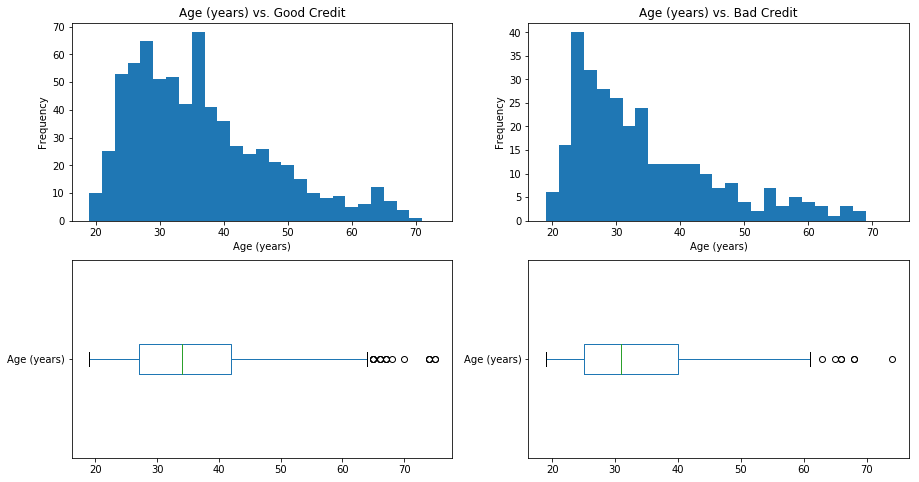

In [44]:
fig = plt.figure()

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

df[df['Credit Risk'] == 'Good']['Age (years)'].plot.hist(bins = range(df['Age (years)'].min(), 
                                                                      df['Age (years)'].max(), 2), 
                                                         ax = ax1,
                                                         figsize = (8,15))
ax1.set_title('Age (years) vs. Good Credit')
ax1.set_xlabel('Age (years)')
ax1.set_ylabel('Frequency')

df[df['Credit Risk'] == 'Bad']['Age (years)'].plot.hist(bins = range(df['Age (years)'].min(), 
                                                                      df['Age (years)'].max(), 2), 
                                                        ax = ax2,
                                                        figsize = (8,15))
ax2.set_title('Age (years) vs. Bad Credit')
ax2.set_xlabel('Age (years)')
ax2.set_ylabel('Frequency')

df[df['Credit Risk'] == 'Good']['Age (years)'].plot.box(ax = ax3, figsize = (15,8), vert = False)

df[df['Credit Risk'] == 'Bad']['Age (years)'].plot.box(ax = ax4, figsize = (15,8), vert = False);

Creditability     
Credit Risk              Bad Good
Age Category                     
(18.944, 33.0]           181  333
(33.0, 47.0]              81  256
(47.0, 61.0]              31   80
(61.0, 75.0]               7   31

Text(0.5,1,'Age Category vs Creditability')

Text(0,0.5,'Frequency')

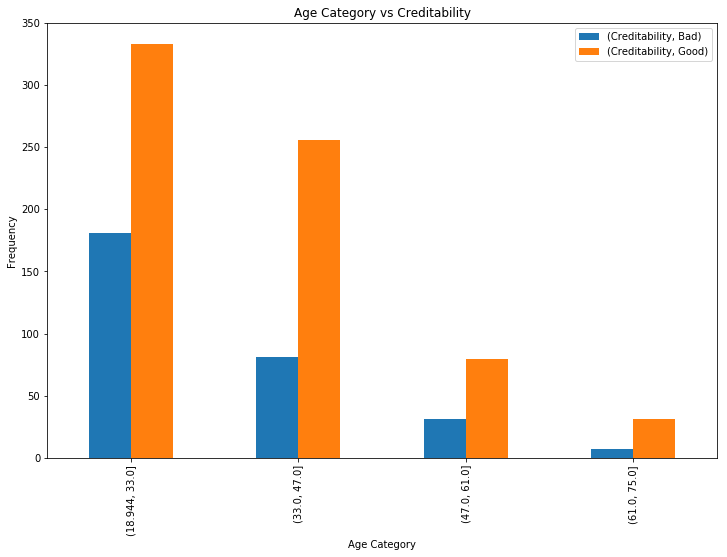

In [45]:
# Age (years) has a wide range of values between 19 and 75, as seen in the graphs above 
# The data is binned using a pd.cut(dataframe, # of bins)
# A new column "Age Category" is created, and "Age (years)" is dropped

df['Age Category'] = pd.cut(df['Age (years)'], 4)

val_count = df.pivot_table(values = ['Creditability'], columns = ['Credit Risk'], 
                           index = ['Age Category'], aggfunc = 'count')
val_count

val_count.plot.bar(figsize = [12,8])
plt.title('Age Category vs Creditability')
plt.ylabel('Frequency')
plt.legend(loc = 'best')

df.drop(['Age (years)'], axis = 1, inplace = True)

## Number of credits at this bank vs Creditability

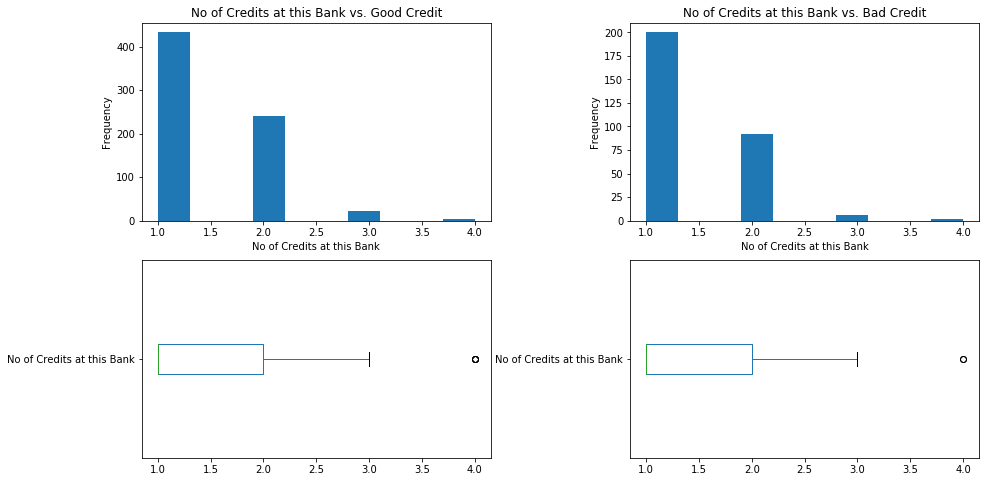

In [46]:
fig = plt.figure()

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
plt.subplots_adjust(wspace = 0.4)

df[df['Credit Risk'] == 'Good']['No of Credits at this Bank'].plot.hist(ax = ax1, figsize = (8,15))
ax1.set_title('No of Credits at this Bank vs. Good Credit')
ax1.set_xlabel('No of Credits at this Bank')
ax1.set_ylabel('Frequency')

df[df['Credit Risk'] == 'Bad']['No of Credits at this Bank'].plot.hist(ax = ax2, figsize = (8,15))
ax2.set_title('No of Credits at this Bank vs. Bad Credit')
ax2.set_xlabel('No of Credits at this Bank')
ax2.set_ylabel('Frequency')

df[df['Credit Risk'] == 'Good']['No of Credits at this Bank'].plot.box(ax = ax3, figsize = (15,8), 
                                                                       vert = False)

df[df['Credit Risk'] == 'Bad']['No of Credits at this Bank'].plot.box(ax = ax4, figsize = (15,8), 
                                                                      vert = False);

'Number of credits at this bank' only contains 4 distinct values. This numerical variable will be treated as a qualitative variable.

## Number of Dependents vs Creditability

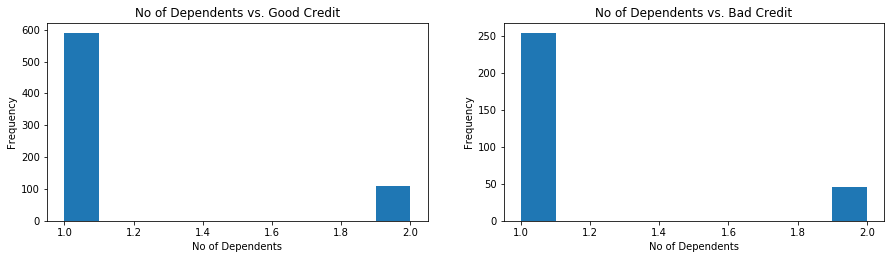

In [49]:
fig = plt.figure()

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

df[df['Credit Risk'] == 'Good']['No of dependents'].plot.hist(ax = ax1, figsize = (15,8))
ax1.set_title('No of Dependents vs. Good Credit')
ax1.set_xlabel('No of Dependents')
ax1.set_ylabel('Frequency')

df[df['Credit Risk'] == 'Bad']['No of dependents'].plot.hist(ax = ax2, figsize = (15,8))
ax2.set_title('No of Dependents vs. Bad Credit')
ax2.set_xlabel('No of Dependents')
ax2.set_ylabel('Frequency');

'Number of Dependents' only contains 2 distinct values. This numerical variable will be treated as a qualitative variable.

In [31]:
df.drop(['Credit Risk'], axis = 1, inplace = True)
df.head()

,Creditability,Account Balance,Payment Status of Previous Credit,Purpose,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,Duration in Current address,...,Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker,Duration of Credit Range,Credit Amount Range,Age Category
0,1,1,4,2,1,2,4,2,1,4,...,3,1,1,3,1,1,1,"(3.932, 21.0]","(231.826, 4793.5]","(18.944, 33.0]"
1,1,1,4,0,1,3,2,3,1,2,...,3,1,2,3,2,1,1,"(3.932, 21.0]","(231.826, 4793.5]","(33.0, 47.0]"
2,1,2,2,9,2,4,2,2,1,4,...,3,1,1,2,1,1,1,"(3.932, 21.0]","(231.826, 4793.5]","(18.944, 33.0]"
3,1,1,4,0,1,3,3,3,1,2,...,3,1,2,2,2,1,2,"(3.932, 21.0]","(231.826, 4793.5]","(33.0, 47.0]"
4,1,1,4,0,1,3,4,3,1,4,...,1,2,2,2,1,1,2,"(3.932, 21.0]","(231.826, 4793.5]","(33.0, 47.0]"


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
Creditability                        1000 non-null int64
Account Balance                      1000 non-null int64
Payment Status of Previous Credit    1000 non-null int64
Purpose                              1000 non-null int64
Value Savings/Stocks                 1000 non-null int64
Length of current employment         1000 non-null int64
Instalment per cent                  1000 non-null int64
Sex & Marital Status                 1000 non-null int64
Guarantors                           1000 non-null int64
Duration in Current address          1000 non-null int64
Most valuable available asset        1000 non-null int64
Concurrent Credits                   1000 non-null int64
Type of apartment                    1000 non-null int64
No of Credits at this Bank           1000 non-null int64
Occupation                           1000 non-null int64
No of dependents                     10

Now that all the varaibles are qualitative or represent qualitative variables, in order to create a model we will converted all features to dummy variables. This will allow all the data to be sorted into mutually exclusive categories for better model fitting.

## Creating Dummy Variables

In [34]:
dummy_list = ['Account Balance', 'Payment Status of Previous Credit', 'Purpose', 'Value Savings/Stocks', 
              'Length of current employment', 'Instalment per cent', 'Sex & Marital Status', 
              'Guarantors', 'Duration in Current address', 'Most valuable available asset',
              'Concurrent Credits', 'Type of apartment', 'No of Credits at this Bank', 'Occupation', 
              'No of dependents', 'Telephone', 'Foreign Worker', 'Duration of Credit Range', 
              'Credit Amount Range', 'Age Category']

def dummy_var(df, dummy_list):
    for i in dummy_list:
        dummies = pd.get_dummies(df[i], prefix = i)
        df = df.drop(i, axis = 1)
        df = pd.concat([df, dummies], axis = 1)
    return df

DF = dummy_var(df, dummy_list)
DF.head()

# Dummy variables have replaced each column except 'Creditability'

,Creditability,Account Balance_1,Account Balance_2,Account Balance_3,Account Balance_4,Payment Status of Previous Credit_0,Payment Status of Previous Credit_1,Payment Status of Previous Credit_2,Payment Status of Previous Credit_3,Payment Status of Previous Credit_4,...,"Duration of Credit Range_(38.0, 55.0]","Duration of Credit Range_(55.0, 72.0]","Credit Amount Range_(231.826, 4793.5]","Credit Amount Range_(4793.5, 9337.0]","Credit Amount Range_(9337.0, 13880.5]","Credit Amount Range_(13880.5, 18424.0]","Age Category_(18.944, 33.0]","Age Category_(33.0, 47.0]","Age Category_(47.0, 61.0]","Age Category_(61.0, 75.0]"
0,1,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
2,1,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0


## Feature and Model Selection

Since the data is now all in binary form, we will assess the performance of 3 classification models 
via 10-Fold Cross Validation. The algorithms will be: Naive Bayes, Decision Tree and Logistic Regression which will be the third algorithm of our choice.

Logistic regression measures the relationship between categorical dependent variables and one or more 
independent variables. In this model, the dependent variable is a binary variable that contains data 
coded as 1 (yes, success, etc.)) or 0 (no, failure, etc.).

To be able to create a model, we first need to determine:
1. Which model works best with the data 
2. Which variables are sufficient for prediction

We assessed #2 using a Chi-square test to determine the right variables to use in our model.

The Chi-Square test of independence is a statistical test to determine if there is a significant 
relationship between 2 categorical variables. In our case, we will use the Chi-Square test to find 
which variables have an association with the Creditability attribute. The higher value of the 
Chi-square score, the more likelihood the feature is correlated with the class, thus it should be 
selected for model training.

This is done by looping through the SelectKBest function, which removes all but the k highest scoring 
variables for all 81 variables. This loop is done 3 times for each type of model.

In each iteration of the loop, a model and subset of variables is trained using the 10-Fold Cross Validation method, where the performance of the models will be measured using accuracy. The accuracy and standard deviations are then recorded in lists for the Naive Bayes, Decision Tree and Logistic Regression models.

Amongst the 3 types of models, the model with highest accuracy Score and it's associated standard deviation is selected for the final predictive model.

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

GaussianNB(priors=None)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

800

200

Text(0,0.5,'Score')

Text(0.5,1,'Chi-square test scores')

'Highest Gaussian Naive Bayes accuracy: 0.75, Standard Deviation: 0.060, k = 21'

'Highest Decision Tree accuracy: 0.73, Standard Deviation: 0.058, k = 4'

'Highest Logistic Regression accuracy: 0.77, Standard Deviation: 0.070, k = 36'

<Container object of 3 artists>

<Container object of 3 artists>

<Container object of 3 artists>

Text(0.5,0,'k')

Text(0,0.5,'Accuracy')

Text(0.5,1,'Model Performance of the 10-Fold Cross Validation')

([<matplotlib.axis.XTick at 0x2b84cd33470>,
 <a list of 80 Text xticklabel objects>)

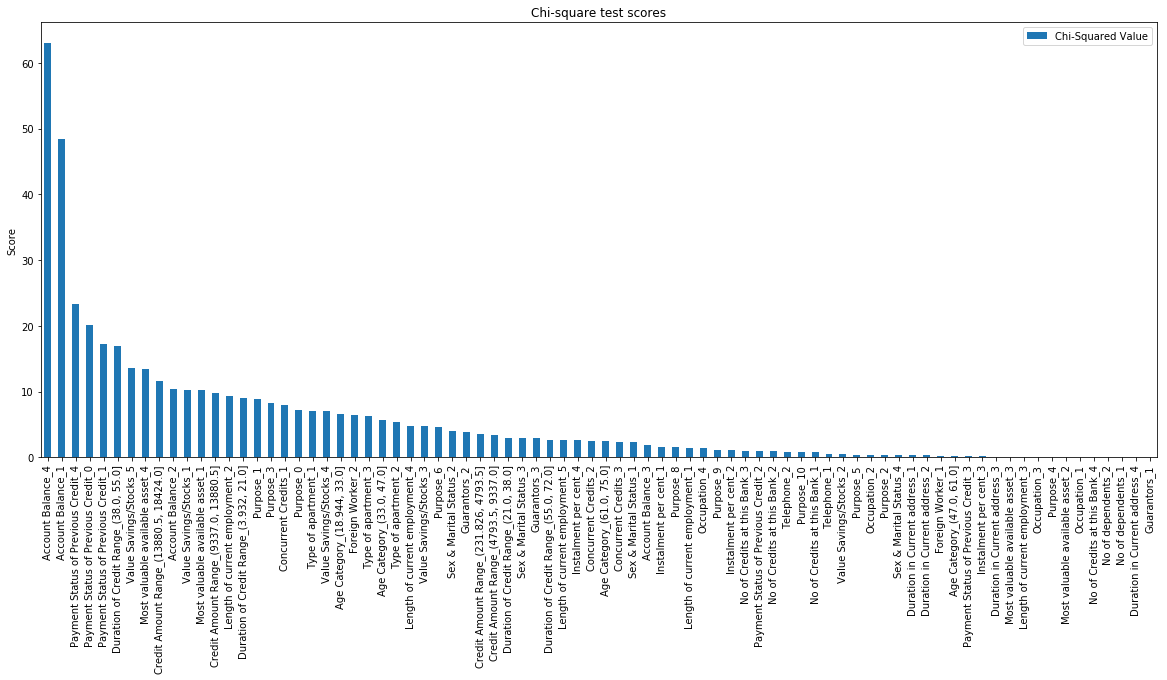

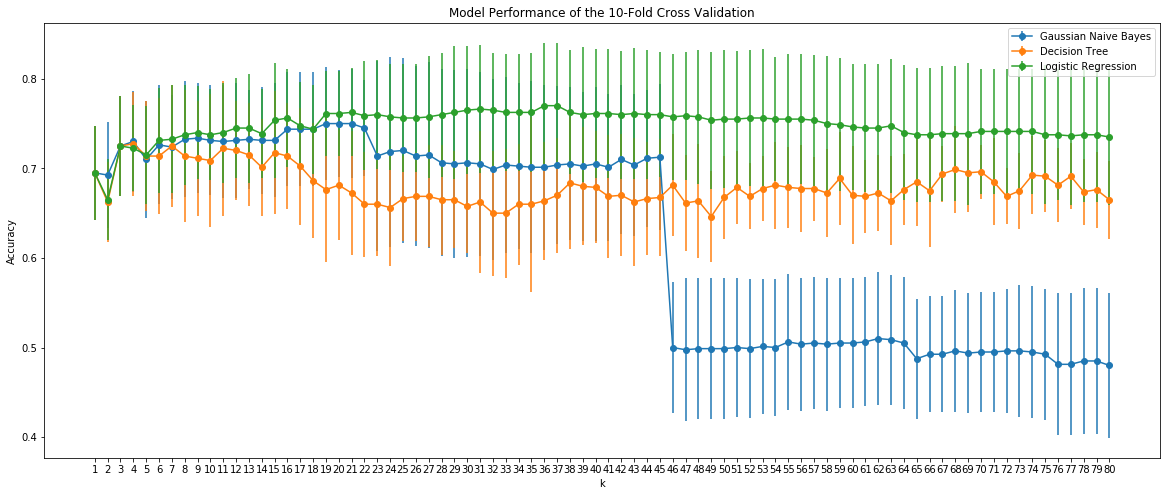

In [35]:
models = {'Gaussian Naive Bayes': GaussianNB(),
          'Decision Tree': DecisionTreeClassifier(),
          'Logistic Regression': LogisticRegression()}

array = DF.values

X = array[:,1:]
Y = array[:,0]

k = range(1, 81)

results = []
std = []

for keys in models.keys():
    for i in k:
        chi2_selector = SelectKBest(chi2, k = i)
        X_kbest = chi2_selector.fit(X, Y)
        X_features = X_kbest.transform(X)
        validation_size = 0.20
        X_train, X_validation, Y_train, Y_validation = train_test_split(X_features, Y, 
                                                                        test_size = validation_size, 
                                                                        random_state = 28)
        clf = models[keys]
        clf.fit(X_train, Y_train) 
        kfold = model_selection.KFold(n_splits = 10, random_state = 28)
        cv_results = model_selection.cross_val_score(clf, X_train, Y_train, cv = kfold, 
                                                     scoring = 'accuracy')
        results.append(cv_results.mean())
        std.append(cv_results.std())
        
train_size = len(X_train)
val_size = len(X_validation)
train_size
val_size

df2 = pd.DataFrame(list(X_kbest.scores_), index = list(DF.columns[1:]), 
                   columns = ['Chi-Squared Value'])        
df2.sort_values('Chi-Squared Value', ascending = False).plot.bar(figsize = (20,8))
plt.ylabel('Score')
plt.title('Chi-square test scores')

result1 = "{0}: {1:.2f}, {2}: {3:.3f}, {4} = {5}".format('Highest Gaussian Naive Bayes accuracy', 
                                            max(results[:80]),
                                            'Standard Deviation', 
                                            std[results.index(max(results[:80]))],
                                            'k', results.index(max(results[:80])) + 1)
result2 = "{0}: {1:.2f}, {2}: {3:.3f}, {4} = {5}".format('Highest Decision Tree accuracy', 
                                            max(results[80:160]), 
                                            'Standard Deviation', 
                                            std[80:160][results[80:160].index(max(results[80:160]))], 
                                            'k', results[80:160].index(max(results[80:160])) + 1)
result3 = "{0}: {1:.2f}, {2}: {3:.3f}, {4} = {5}".format('Highest Logistic Regression accuracy', 
                                            max(results[160:]), 
                                            'Standard Deviation', 
                                            std[160:][results[160:].index(max(results[160:]))], 
                                            'k', results[160:].index(max(results[160:])) + 1)
result1
result2
result3

plt.figure(figsize = (20,8))
plt.errorbar(k, results[:80], yerr = std[:80], fmt = '-o', label = 'Gaussian Naive Bayes')
plt.errorbar(k, results[80:160], yerr = std[80:160], fmt = '-o', label = 'Decision Tree')
plt.errorbar(k, results[160:], yerr = std[160:], fmt = '-o', label = 'Logistic Regression')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Model Performance of the 10-Fold Cross Validation')
plt.xticks(k)
plt.legend(loc = 'best')

Highest Gaussian Naive Bayes accuracy: 0.75, Standard Deviation: 0.060, k = 21

Highest Decision Tree accuracy: 0.73, Standard Deviation: 0.058, k = 4

Highest Logistic Regression accuracy: 0.77, Standard Deviation: 0.070, k = 36

Logistic Regression had the highest accuracy and as a result was chosen for predictive modelling. This model will use the 36 variables that scored the highest in the Chi-square test in order to predict the class attribute.

In [36]:
# The code below will identifiy the 36 variables that scored the highest in the Chi-square test.
df2.sort_values('Chi-Squared Value', ascending = False).index[:36]

Index(['Account Balance_4', 'Account Balance_1',
       'Payment Status of Previous Credit_4',
       'Payment Status of Previous Credit_0',
       'Payment Status of Previous Credit_1',
       'Duration of Credit Range_(38.0, 55.0]', 'Value Savings/Stocks_5',
       'Most valuable available asset_4',
       'Credit Amount Range_(13880.5, 18424.0]', 'Account Balance_2',
       'Value Savings/Stocks_1', 'Most valuable available asset_1',
       'Credit Amount Range_(9337.0, 13880.5]',
       'Length of current employment_2',
       'Duration of Credit Range_(3.932, 21.0]', 'Purpose_1', 'Purpose_3',
       'Concurrent Credits_1', 'Purpose_0', 'Type of apartment_1',
       'Value Savings/Stocks_4', 'Age Category_(18.944, 33.0]',
       'Foreign Worker_2', 'Type of apartment_3', 'Age Category_(33.0, 47.0]',
       'Type of apartment_2', 'Length of current employment_4',
       'Value Savings/Stocks_3', 'Purpose_6', 'Sex & Marital Status_2',
       'Guarantors_2', 'Credit Amount Range_(231.

## Predictive Modeling

In [37]:
X = DF[df2.sort_values('Chi-Squared Value', ascending = False).index[:36]]

validation_size = 0.2
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size = validation_size, 
                                                                random_state = 28)    

clf = LogisticRegression()
clf.fit(X_train, Y_train) 

pred_clf = clf.predict(X_validation)

train_score = 'Train score: {0:.2f}'.format(clf.score(X_train, Y_train))
test_score = 'Test score: {0:.2f}'.format(clf.score(X_validation, Y_validation))
    
train_score
test_score

Y_validation
pred_clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

'Train score: 0.79'

'Test score: 0.79'

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0], dtype=int64)

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0], dtype=int64)

## Conclusion and Recommendation

Using the 36 highest scoring variables, identified in the chi square test and splitting the data into train and test/validation datasets, we fit a logistic regression model and scored the train and test/validation sets. The train set scored 0.79 and the test/validation set scored 0.79, thus achieving a generalized model. We recommend that the bank managers consider the 36 highest scoring variables used in our model in order to make a decision about loan approval. The original attributes that these variables fall into are (from highest to lowest scoring): Account Balance, Payment Status of Previous Credit, Duration of Credit (month), Value Savings/Stocks, Most valuable available asset, Credit Amount, Length of current employment, Purpose, Concurrent Credits, Type of apartment, Age (years), Foreign Worker, Sex & Marital Status, and Guarantors. These 14 attributes out of the original 20 attributes should be taken into consideration the most in terms of loan approval since they have the most influence on the class attribute (i.e. Creditability).